In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly.graph_objects as go
import generateGraphs


%matplotlib inline

In [2]:
donationData = pd.read_csv("donations_anonymized.csv", dtype={'zip':str})
#print(donationData.shape)
donationData.drop(['target'], axis=1, inplace=True) #redundant column
#print(donationData.anon_donor_id.unique().shape)
donationData = donationData.iloc[:2189] #get everything EXCEPT the last row which has a bad date
donationData = donationData[donationData['campaign'] != 'In-Kind']
donationData = donationData[donationData['campaign'] != 'In/Out']

donationData = donationData[donationData['amount'] != donationData['amount'].max()] #remove big outlier, note that this is a "Misc" campaign

donationData['date'] = pd.to_datetime(donationData['date'])
donationData['date'].max()

donationData.groupby(['campaign']).sum().sort_values(['amount'], ascending=False)

,anon_donor_id,do_not_mail,do_not_call,amount
campaign,,,,
Foundation,32417,0,0,332162.00
Emerg fund,76159,1,1,133508.81
Fall Towns,477698,18,13,122969.39
Misc,103195,1,1,122941.00
Sprg Evt,360015,13,10,112279.34
Church,17833,0,0,64510.00
Special Pr,1215,0,0,47079.90
Corporatio,12046,0,0,43853.10
Grants,270,0,0,40000.00


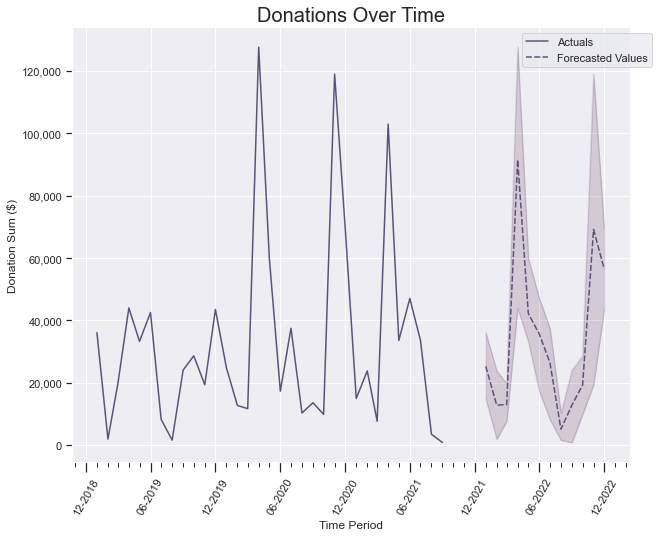

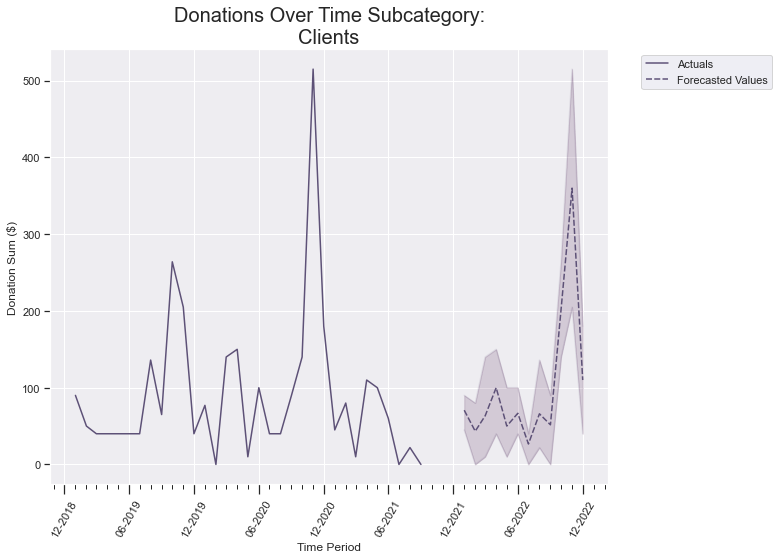

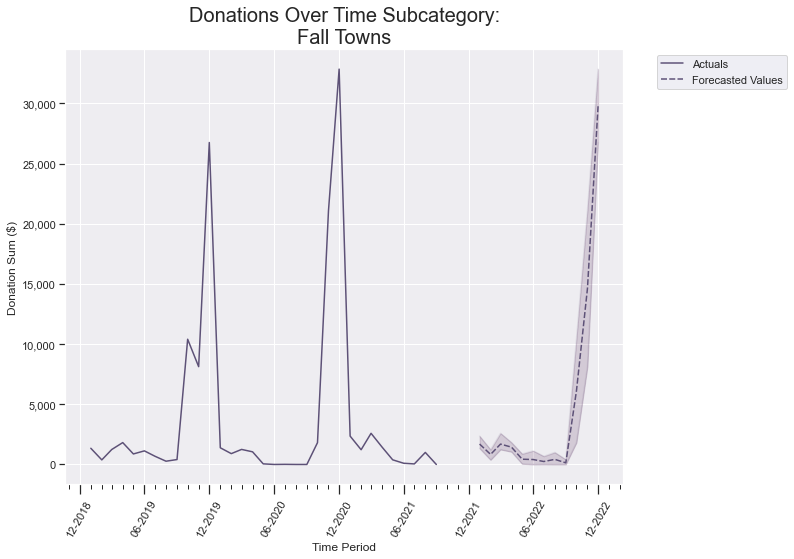

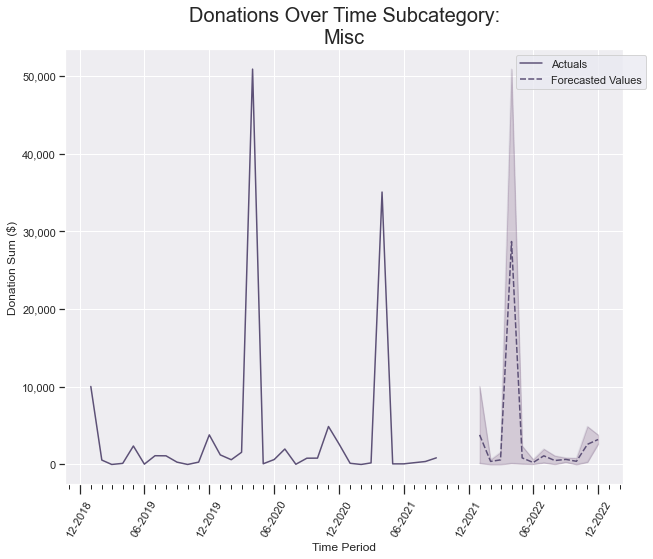

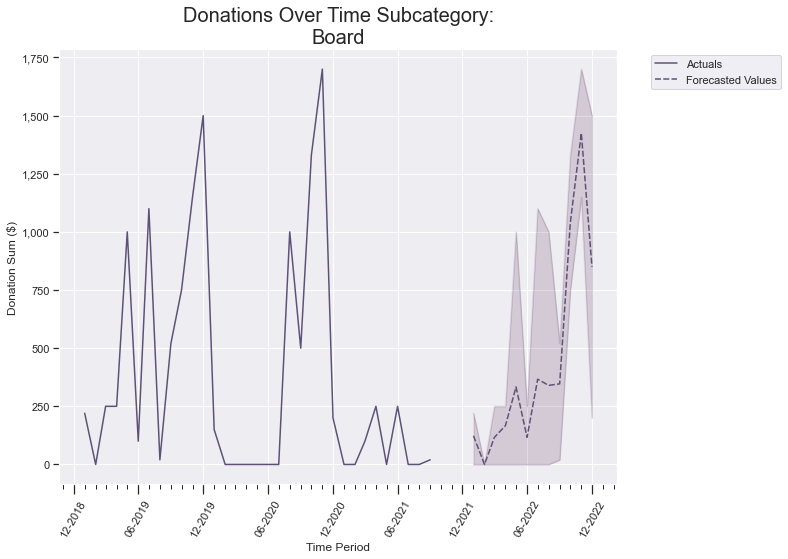

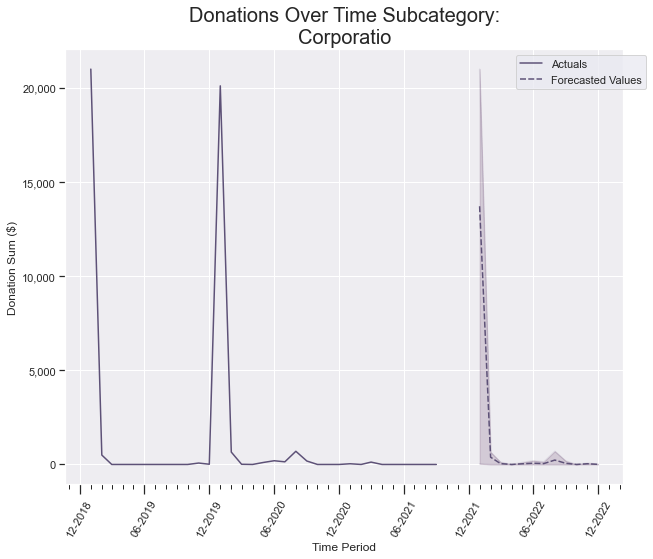

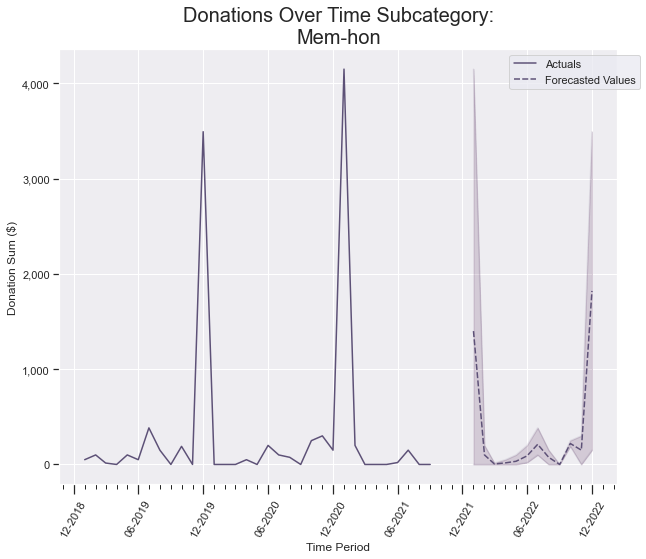

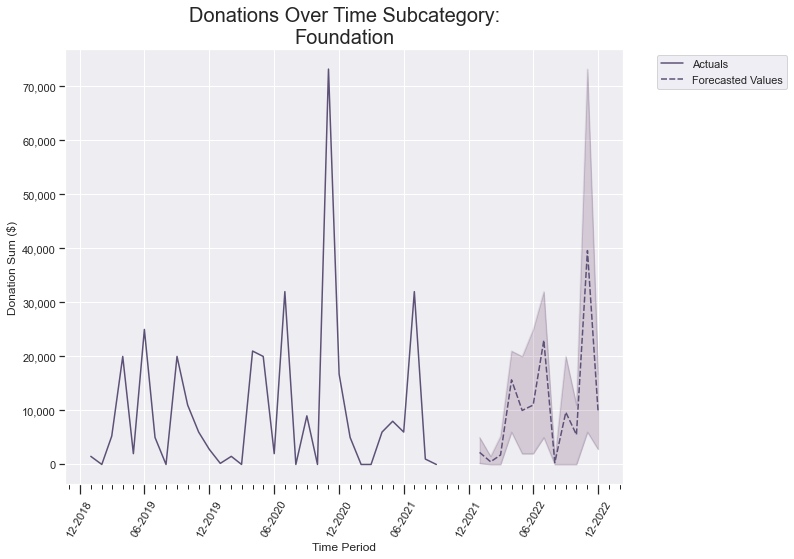

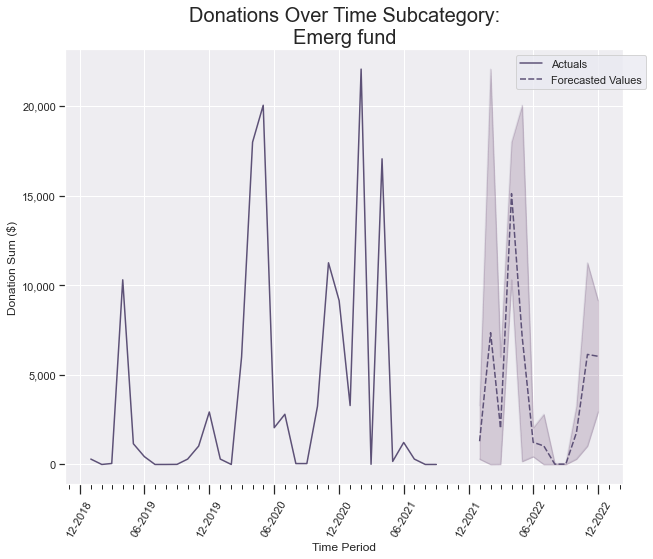

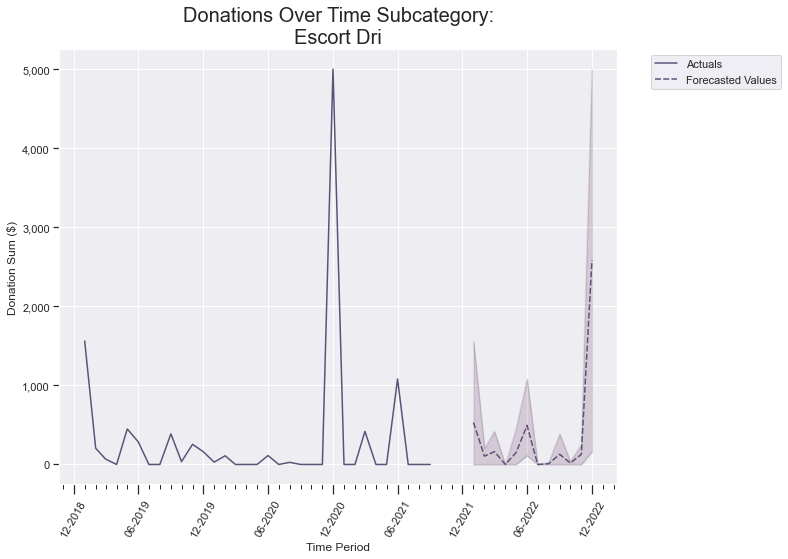

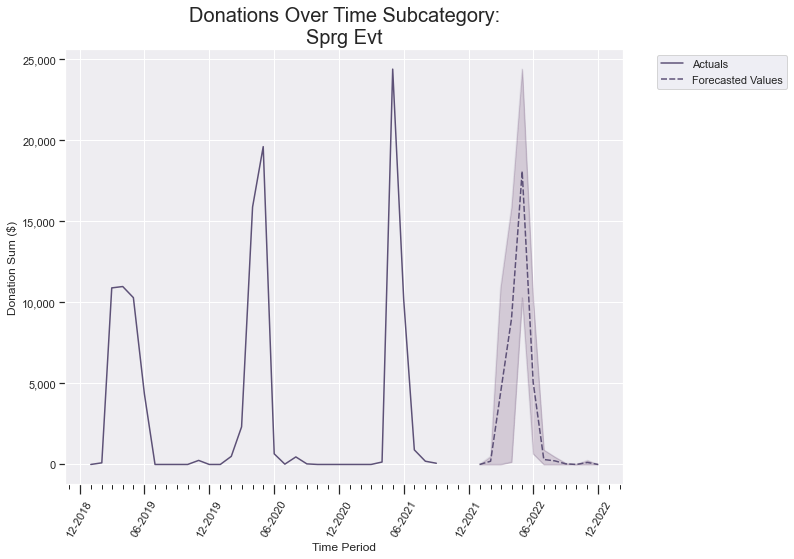

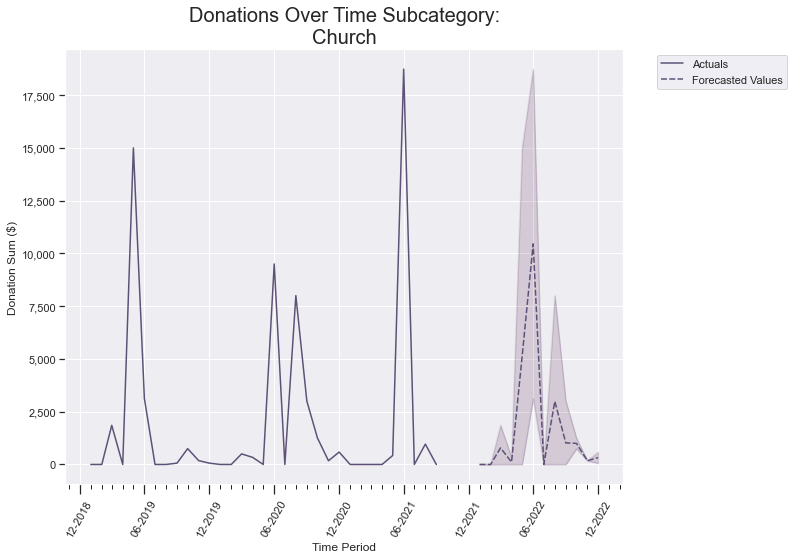

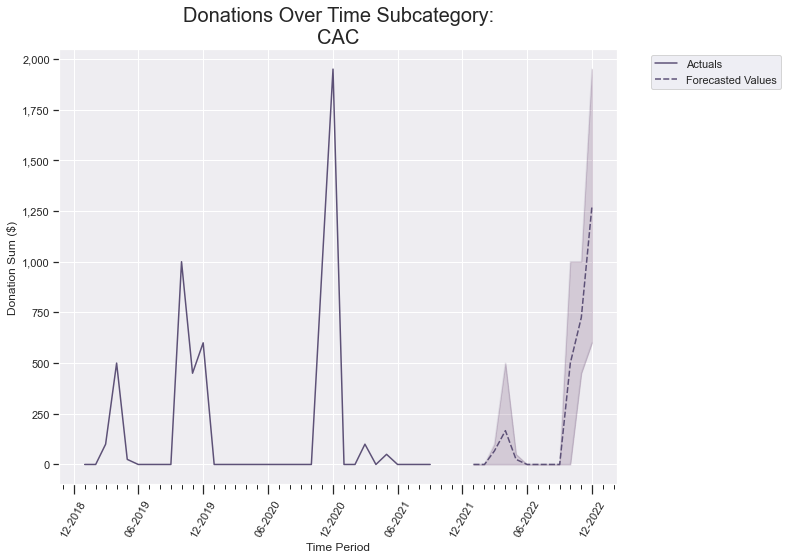

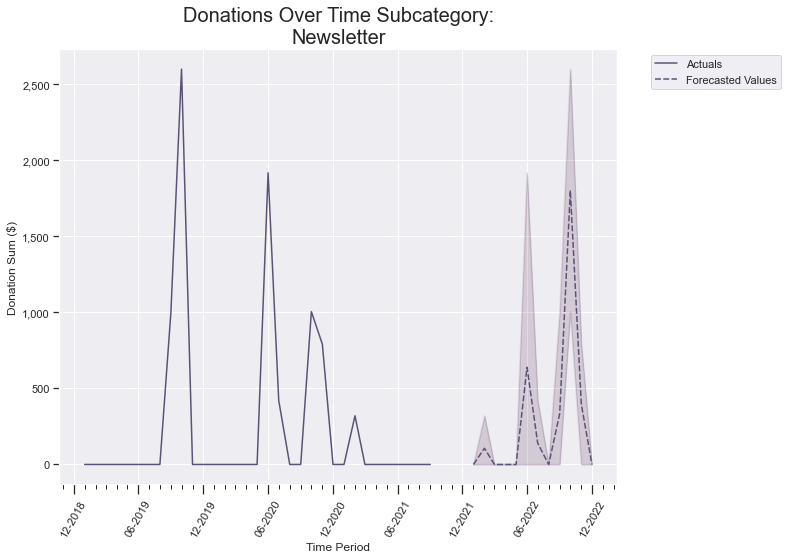

In [3]:
donationData['campaign'].unique()
listOfCategories = ['Clients', 'Fall Towns', 'Misc', 'Board', 'Corporatio', 'Mem-hon',
       'Foundation', 'Emerg fund', 'Escort Dri', 'Sprg Evt',
       'Church', 'CAC', 'Newsletter']

generateGraphs.generateGraphSet(dataFrameNameForTitle = 'Donations', df = donationData, dateColumn='date',specialColumnForCategory ='campaign', 
                                listOfCategories= listOfCategories, columnForAnalysis='amount', 
                                yAxisNameForGraph= 'Donation Sum ($)', isDollars='Yes')

In [4]:
"""for columnName in donationData.columns:
    if columnName == "anon_donor_id":
        pass 
    else:
        print(columnName)
        print(donationData[columnName].unique())
        print("\n")
print(donationData['organisation'].unique())"""

'for columnName in donationData.columns:\n    if columnName == "anon_donor_id":\n        pass \n    else:\n        print(columnName)\n        print(donationData[columnName].unique())\n        print("\n")\nprint(donationData[\'organisation\'].unique())'

In [5]:
"""for campaignName in donationData['campaign'].unique():
    filteredByCampaignDF = donationData[donationData['campaign']== campaignName]
    sns.set(rc={'figure.figsize':(8,6)})
    ax = sns.scatterplot(data=filteredByCampaignDF, x="date", y="amount")
    ax.set_title(campaignName, fontsize=16)
    plt.show()"""

'for campaignName in donationData[\'campaign\'].unique():\n    filteredByCampaignDF = donationData[donationData[\'campaign\']== campaignName]\n    sns.set(rc={\'figure.figsize\':(8,6)})\n    ax = sns.scatterplot(data=filteredByCampaignDF, x="date", y="amount")\n    ax.set_title(campaignName, fontsize=16)\n    plt.show()'

In [6]:
"""donationData['Quarter_FY'] = donationData['date'].dt.quarter
donationData['FY'] = donationData['date'].dt.year
donationData['month'] = donationData['date'].dt.month
groupByFYQuarter = donationData.groupby(['FY','Quarter_FY']).sum()['amount']
groupByFYMonth = donationData.groupby(['FY','month']).sum()['amount']

groupByFYQuarterCampaign = donationData.groupby(['campaign','FY','Quarter_FY']).sum()['amount']
groupByFYMonthCampaign = donationData.groupby(['campaign','FY','month']).sum()['amount']
"""

"donationData['Quarter_FY'] = donationData['date'].dt.quarter\ndonationData['FY'] = donationData['date'].dt.year\ndonationData['month'] = donationData['date'].dt.month\ngroupByFYQuarter = donationData.groupby(['FY','Quarter_FY']).sum()['amount']\ngroupByFYMonth = donationData.groupby(['FY','month']).sum()['amount']\n\ngroupByFYQuarterCampaign = donationData.groupby(['campaign','FY','Quarter_FY']).sum()['amount']\ngroupByFYMonthCampaign = donationData.groupby(['campaign','FY','month']).sum()['amount']\n"

In [7]:
# test groupByFYQuarterCampaign['AMCRC'].plot(kind='bar', stacked=True,figsize=(15, 8))

In [8]:
"""for campaignName in donationData['campaign'].unique():
    sns.set(rc={'figure.figsize':(8,6)})
    ax = groupByFYQuarterCampaign[campaignName].plot(kind='bar', stacked=True,figsize=(15, 8))
    ax.set_title(campaignName, fontsize=16)
    plt.show()
    ax = groupByFYMonthCampaign[campaignName].plot(kind='bar', stacked=True,figsize=(15, 8))
    ax.set_title(campaignName, fontsize=16)
    plt.show()"""

"for campaignName in donationData['campaign'].unique():\n    sns.set(rc={'figure.figsize':(8,6)})\n    ax = groupByFYQuarterCampaign[campaignName].plot(kind='bar', stacked=True,figsize=(15, 8))\n    ax.set_title(campaignName, fontsize=16)\n    plt.show()\n    ax = groupByFYMonthCampaign[campaignName].plot(kind='bar', stacked=True,figsize=(15, 8))\n    ax.set_title(campaignName, fontsize=16)\n    plt.show()"

In [9]:
#highestClients = donationData.groupby(['anon_donor_id']).sum()['amount']

In [10]:
#print(highestClients.sort_values(ascending = False)[:20])
#print(highestClients.describe())

In [11]:
"""#boxplot of donations? 

####
#Overall bar graphs

groupByFYQuarter = donationData.groupby(['FY','Quarter_FY']).sum()['amount']

#creating projections for FYQuarter
groupByFYQuarterAvgList = groupByFYQuarter.groupby(['Quarter_FY']).mean().to_list()
indexYear = [(2022, 1),(2022, 2),(2022, 3),(2022, 4)]
groupByFYQuarterAvgSeries = pd.Series(groupByFYQuarterAvgList, index=indexYear) #convert to series to append

groupByFYQuarterIncl2022 = groupByFYQuarter.append(groupByFYQuarterAvgSeries)

groupByFYQuarterIncl2022DF = pd.DataFrame(groupByFYQuarterIncl2022, columns = ['Donation_Amount'])
groupByFYQuarterIncl2022DF = groupByFYQuarterIncl2022DF.reset_index()




groupByFYMonth = donationData.groupby(['FY','month']).sum()['amount']
groupByFYMonthDF = pd.DataFrame(groupByFYMonth)

#come up with predictions based on averages

#creating projections for FYMonth
groupByFYMonthAvg = groupByFYMonth.groupby(['month']).mean().to_list()
indexYear = [(2022, 1),(2022, 2),(2022, 3),(2022, 4),
             (2022, 5),(2022, 6),(2022, 7),(2022, 8),
             (2022, 9),(2022, 10),(2022, 11),(2022, 12)]
groupByFYMonthAvg2022 = pd.Series(groupByFYMonthAvg, index=indexYear)
"""

"#boxplot of donations? \n\n####\n#Overall bar graphs\n\ngroupByFYQuarter = donationData.groupby(['FY','Quarter_FY']).sum()['amount']\n\n#creating projections for FYQuarter\ngroupByFYQuarterAvgList = groupByFYQuarter.groupby(['Quarter_FY']).mean().to_list()\nindexYear = [(2022, 1),(2022, 2),(2022, 3),(2022, 4)]\ngroupByFYQuarterAvgSeries = pd.Series(groupByFYQuarterAvgList, index=indexYear) #convert to series to append\n\ngroupByFYQuarterIncl2022 = groupByFYQuarter.append(groupByFYQuarterAvgSeries)\n\ngroupByFYQuarterIncl2022DF = pd.DataFrame(groupByFYQuarterIncl2022, columns = ['Donation_Amount'])\ngroupByFYQuarterIncl2022DF = groupByFYQuarterIncl2022DF.reset_index()\n\n\n\n\ngroupByFYMonth = donationData.groupby(['FY','month']).sum()['amount']\ngroupByFYMonthDF = pd.DataFrame(groupByFYMonth)\n\n#come up with predictions based on averages\n\n#creating projections for FYMonth\ngroupByFYMonthAvg = groupByFYMonth.groupby(['month']).mean().to_list()\nindexYear = [(2022, 1),(2022, 2),(2022

In [12]:
"""groupByFYMonth = groupByFYMonth.append(groupByFYMonthAvg2022)
groupByFYMonthInc2022DF = pd.DataFrame(groupByFYMonth)
groupByFYMonthInc2022DF = groupByFYMonthInc2022DF.reset_index(level =['FY','month'])
#groupByFYMonthInc2022DF.reset_index(level =['FY','month'], inplace = True)
#roupByFYMonthInc2022DF.columns
groupByFYMonthInc2022DF"""

"groupByFYMonth = groupByFYMonth.append(groupByFYMonthAvg2022)\ngroupByFYMonthInc2022DF = pd.DataFrame(groupByFYMonth)\ngroupByFYMonthInc2022DF = groupByFYMonthInc2022DF.reset_index(level =['FY','month'])\n#groupByFYMonthInc2022DF.reset_index(level =['FY','month'], inplace = True)\n#roupByFYMonthInc2022DF.columns\ngroupByFYMonthInc2022DF"

In [13]:
"""sns.set(rc={'figure.figsize':(8,6)})
#ax = groupByFYQuarter.plot(kind='bar', stacked=True,figsize=(15, 8))
ax = sns.barplot(x=groupByFYQuarterIncl2022DF['Quarter_FY'], y=groupByFYQuarterIncl2022DF['Donation_Amount'], 
                 hue = "FY", data=groupByFYQuarterIncl2022DF) #switch around and post both, maybe make chart bigger
ax.set_title("Donations plot by FY Quarter", fontsize=16)
plt.show()


ax = sns.lineplot(x=groupByFYMonthDF.index, y=groupByFYMonthDF['amount'])
ax.set_title("Plot by Month", fontsize=16)
plt.show()"""

"""#WHY DOES IT NOT PLOT to the right?
fig, ax1 = plt.subplots()
ax1.plot(groupByFYMonth['month'], y1, 'g-')
#ax1 = groupByFYMonth.plot(kind='line')
#ax2 = groupByFYMonthAvg2022.plot(kind='line', figsize=(15, 8))
ax.set_title("Donations plot by Month", fontsize=16)
plt.show()

testXData = groupByFYMonth.append(groupByFYMonthAvg2022)

ax = groupByFYMonth.plot(kind='line')
ax2 = groupByFYMonthAvg2022.plot(kind='line')
ax.set_title("Donations plot by Month", fontsize=16)
left, right = plt.xlim()
print(left, right)
plt.show()
"""

'#WHY DOES IT NOT PLOT to the right?\nfig, ax1 = plt.subplots()\nax1.plot(groupByFYMonth[\'month\'], y1, \'g-\')\n#ax1 = groupByFYMonth.plot(kind=\'line\')\n#ax2 = groupByFYMonthAvg2022.plot(kind=\'line\', figsize=(15, 8))\nax.set_title("Donations plot by Month", fontsize=16)\nplt.show()\n\ntestXData = groupByFYMonth.append(groupByFYMonthAvg2022)\n\nax = groupByFYMonth.plot(kind=\'line\')\nax2 = groupByFYMonthAvg2022.plot(kind=\'line\')\nax.set_title("Donations plot by Month", fontsize=16)\nleft, right = plt.xlim()\nprint(left, right)\nplt.show()\n'